# Explore here

In [2]:
import pandas as pd

df_diabetes = pd.read_csv ('/Users/luiseduardogarciablanco/Desktop/bootcamp/arbol decision/decision_tree_project/diabetes.csv')
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Descripcion de las columnas del DataFrame:

Pregnancies. Número de embarazos del paciente (numérico)
Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
BMI. Índice de masa corporal (numérico)
DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
Age. Edad del paciente (numérico)
Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

In [3]:
df_diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Resumen estadístico
print(df_diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

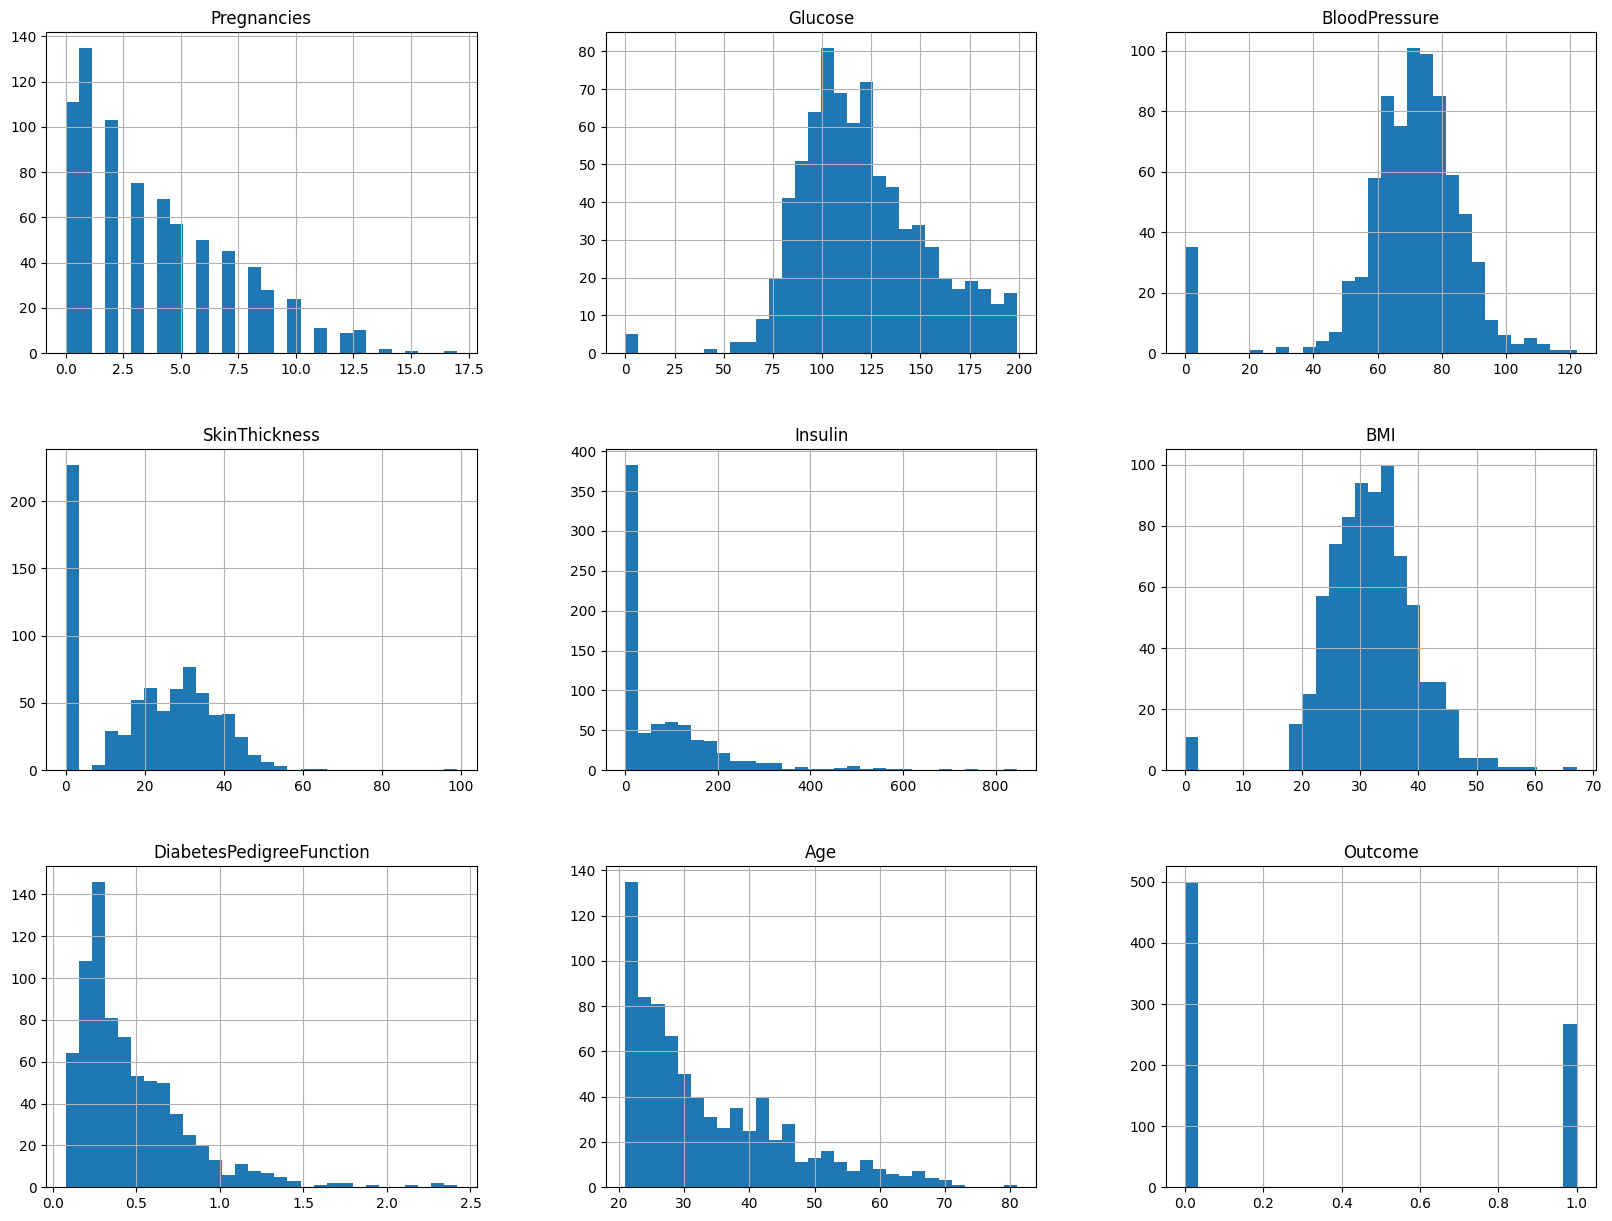

In [5]:
import matplotlib.pyplot as plt

# Crear histogramas para cada columna
df_diabetes.hist(bins=30, figsize=(20, 15))
plt.show()


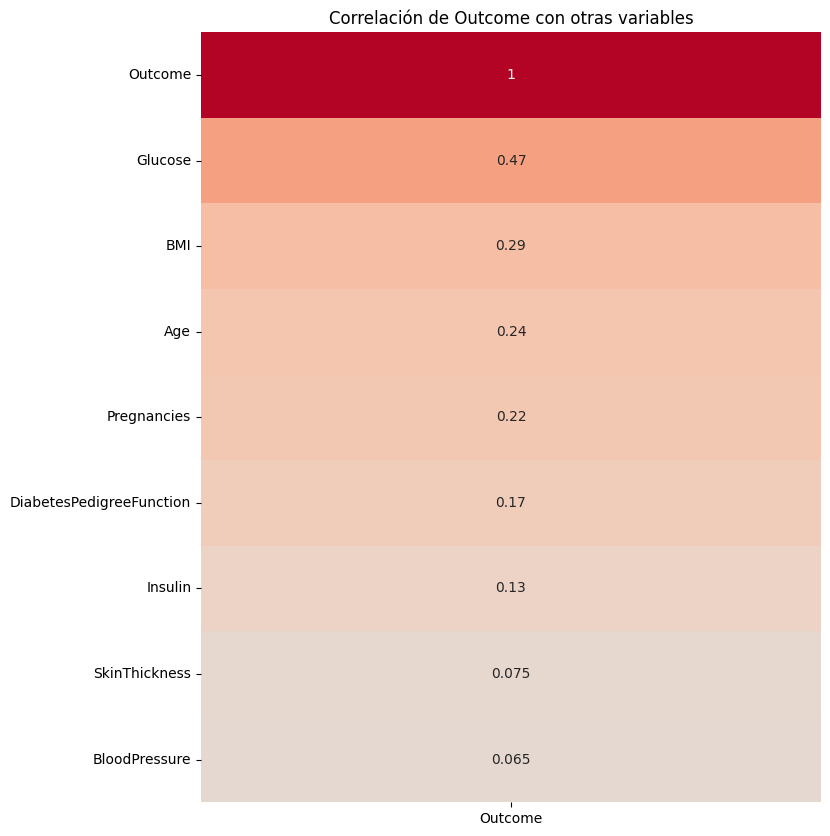

In [9]:

import seaborn as sns


# Calcular la matriz de correlación
correlation_matrix = df_diabetes.corr()

# Seleccionar la correlación con la columna 'Outcome'
outcome_correlation = correlation_matrix[['Outcome']].sort_values(by='Outcome', ascending=False)

# Crear un mapa de calor solo para la correlación con 'Outcome'
plt.figure(figsize=(8, 10))
sns.heatmap(outcome_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)

# Mostrar el gráfico
plt.title('Correlación de Outcome con otras variables')
plt.show()

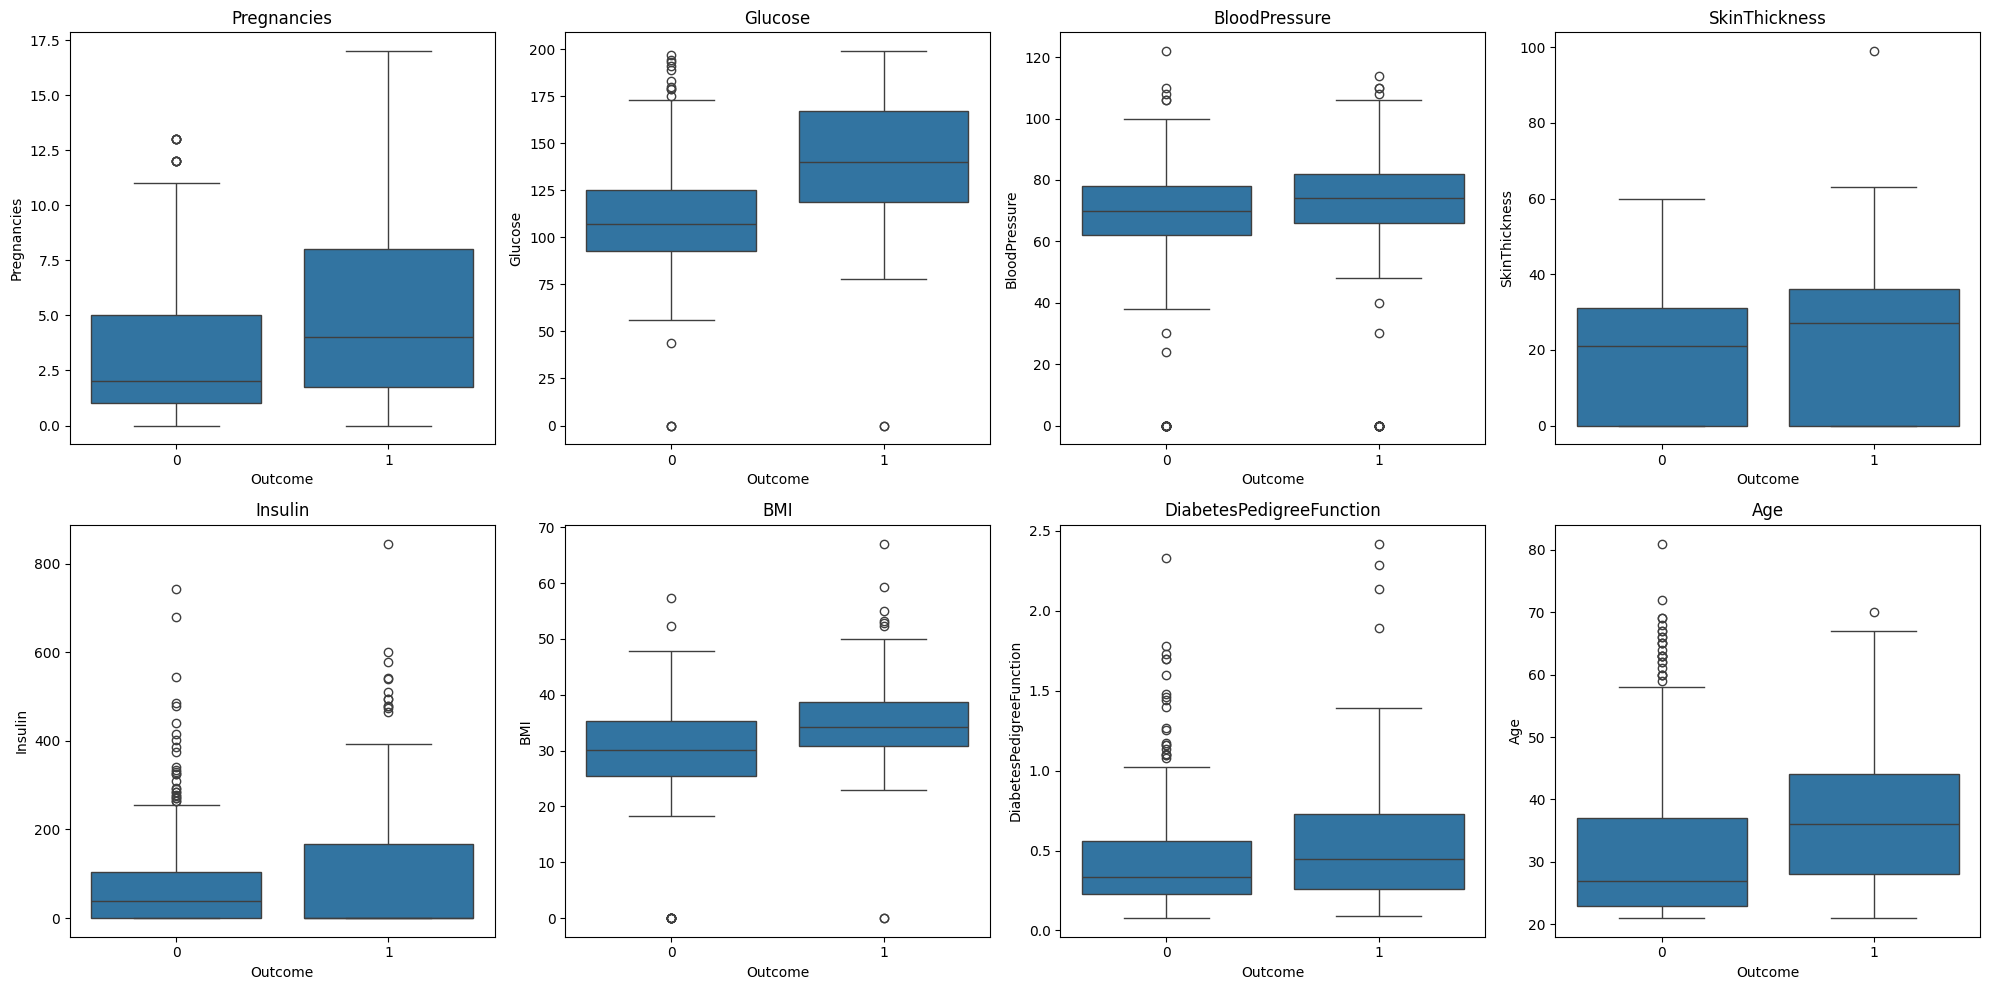

In [7]:
# Boxplots para comparar características
plt.figure(figsize=(20, 10))

for i, column in enumerate(df_diabetes.columns[:-1], 1):  # Excluimos 'Outcome'
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=column, data=df_diabetes)
    plt.title(column)

plt.tight_layout()
plt.show()

Con el EDA terminado empezamos a aplicar un Desicion Tree para entrenar el modelo de prediccion 

In [10]:
# Separar características y variable objetivo
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

In [23]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report


from sklearn.metrics import confusion_matrix


from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape},{y_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape},{y_test.shape}')

Tamaño del conjunto de entrenamiento: (614, 8),(614,)
Tamaño del conjunto de prueba: (154, 8),(154,)


<Axes: >

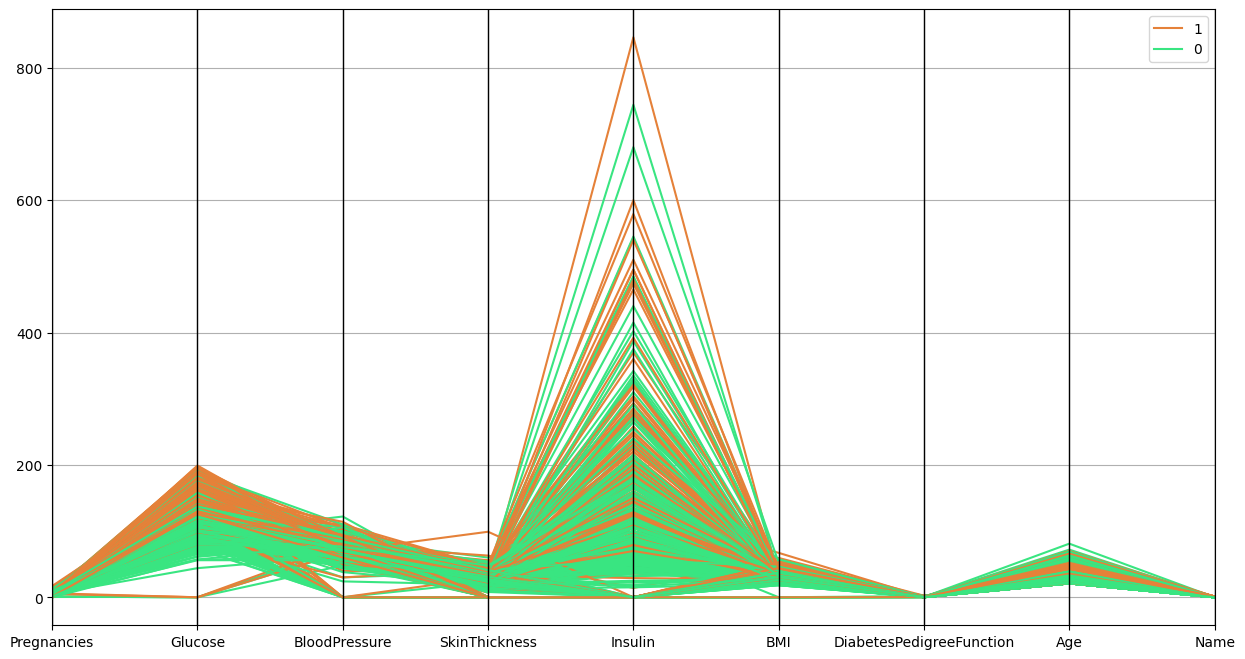

In [21]:
total_data = X
total_data["Outcome"] = y
plt.figure(figsize=(15, 8))
pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581"))

In [36]:
# Crear el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

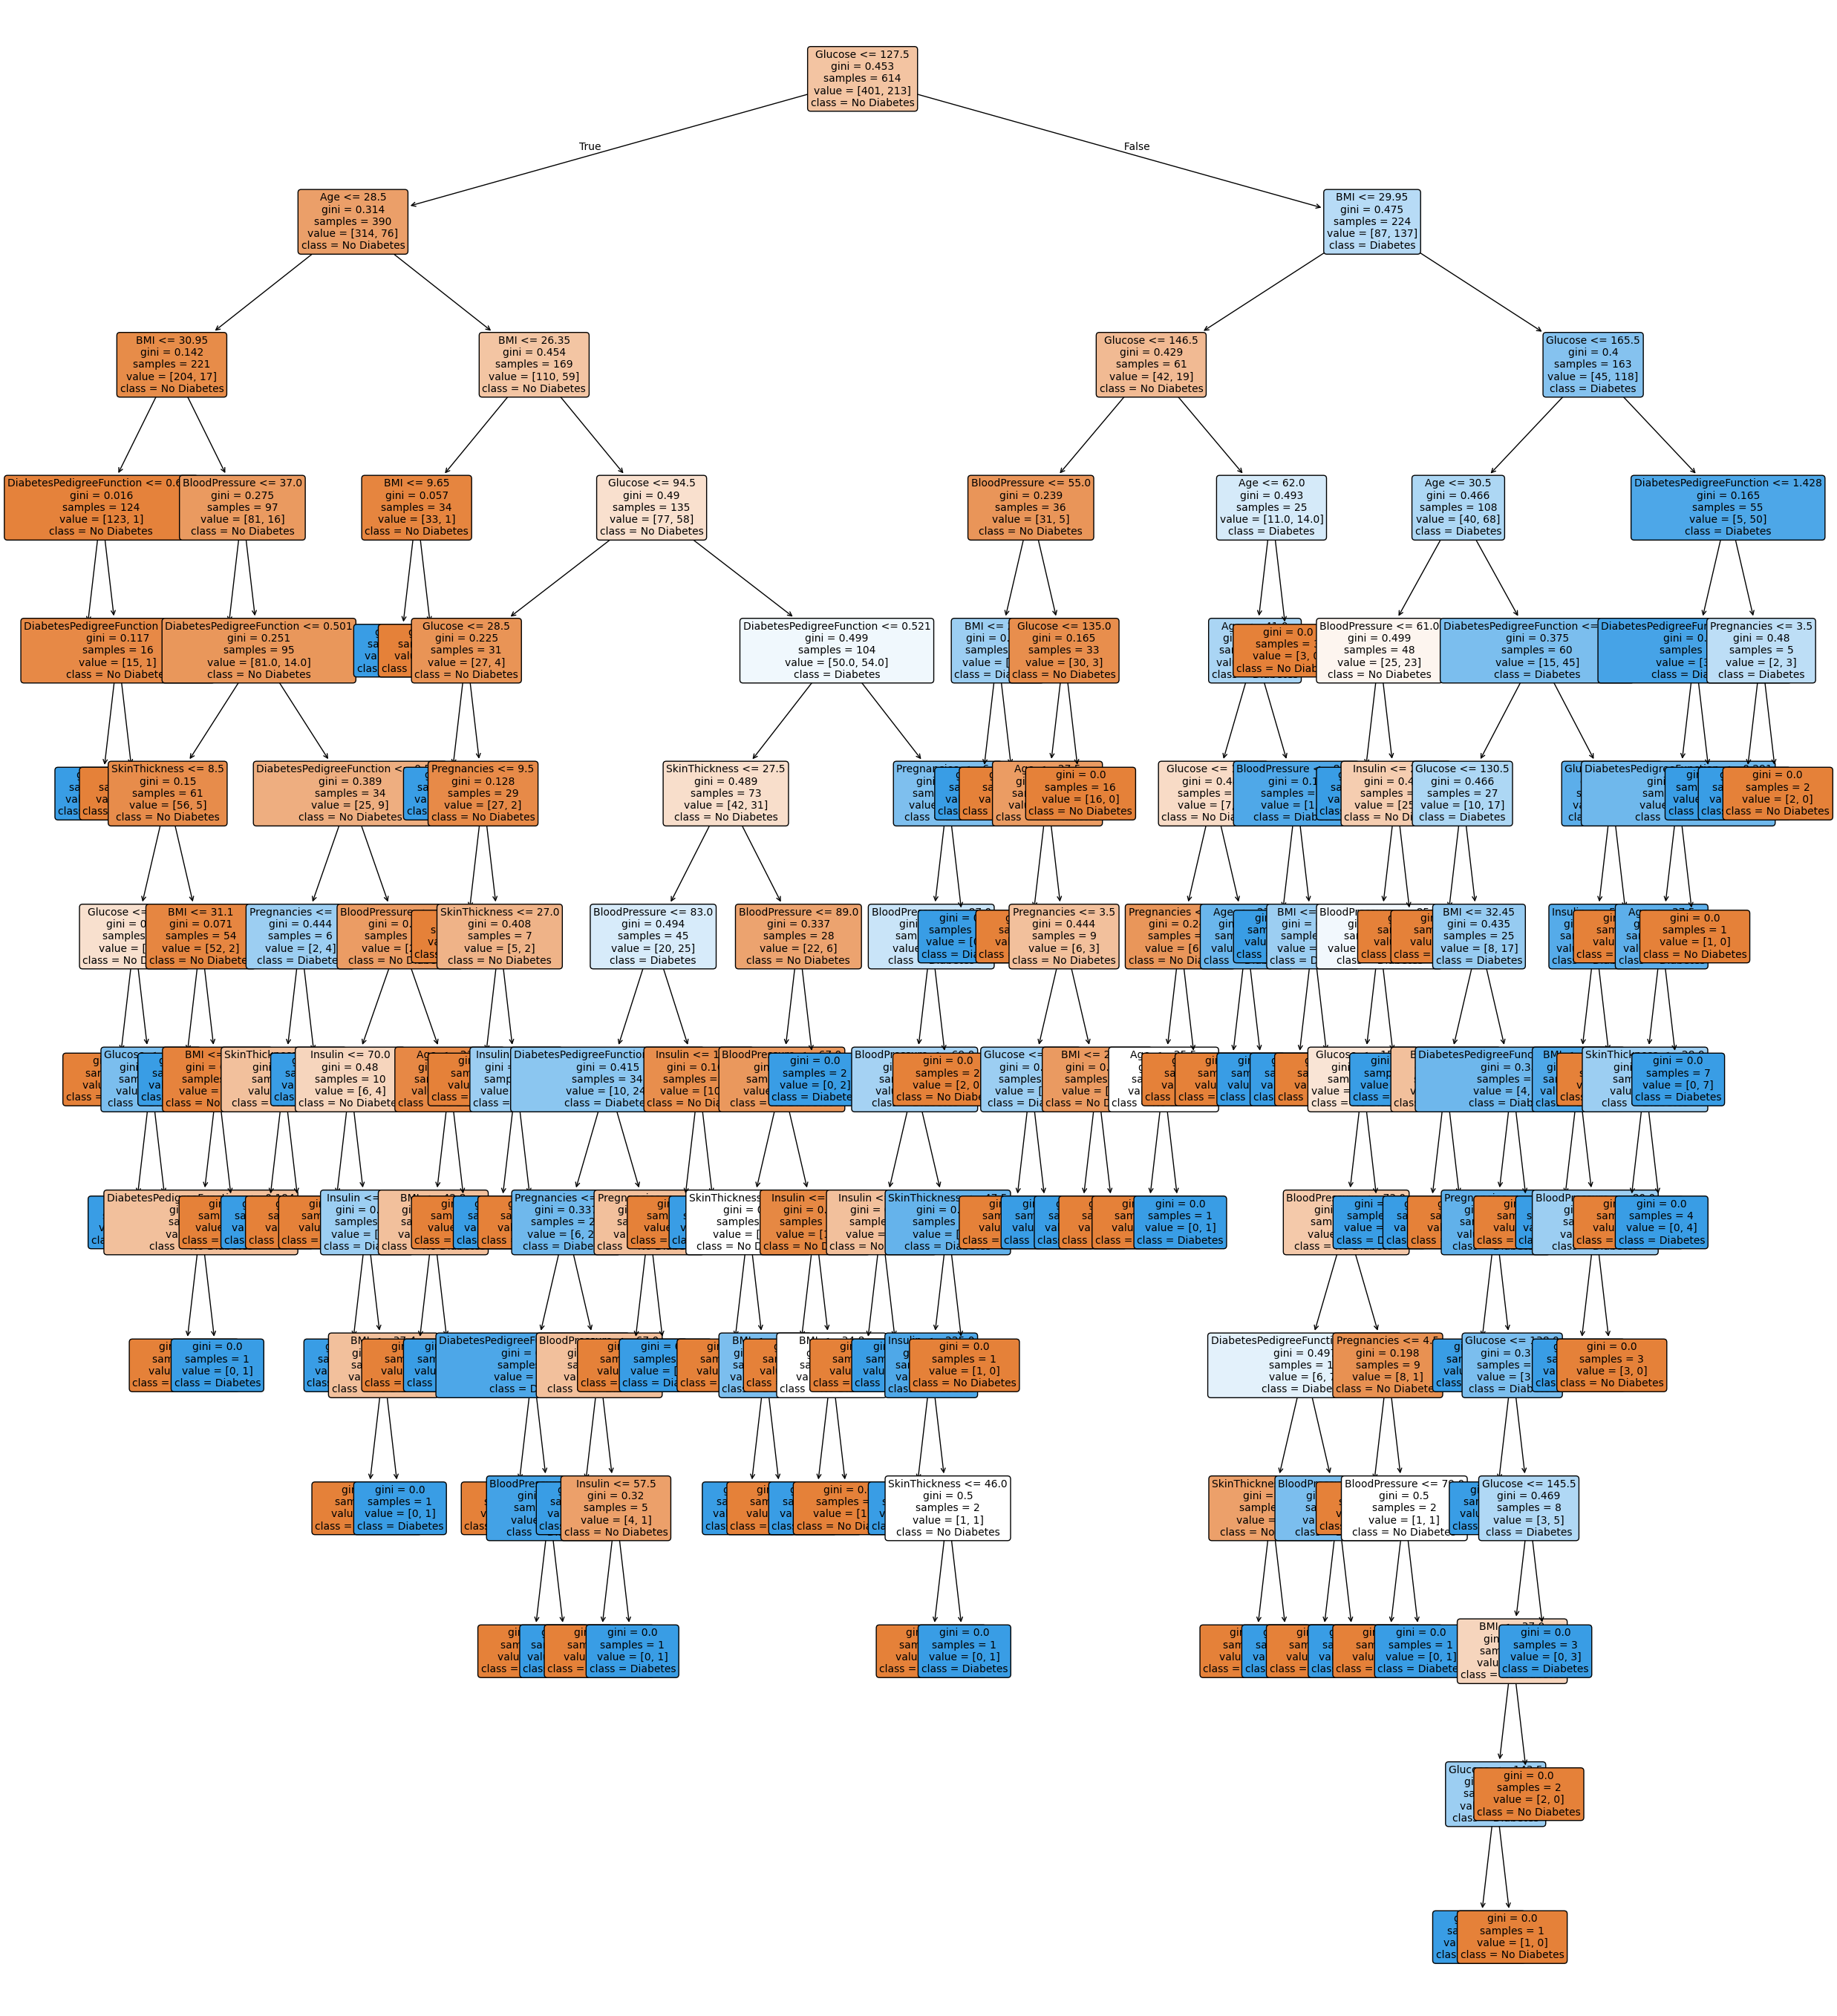

In [33]:
#graficamos el arbol de decision
from sklearn.tree import plot_tree
# Crear una figura de tamaño adecuado
fig = plt.figure(figsize=(30, 35))  # Ajusta el tamaño de la figura según tus necesidades

# Graficar el árbol de decisión
plot_tree(dt_model, 
          feature_names=X_train.columns,  # Nombres de las características
          class_names=["No Diabetes", "Diabetes"],  # Nombres de las clases
          filled=True,  # Colorear las celdas
          rounded=True,  # Bordes redondeados para una mejor visualización
          fontsize=10)  # Tamaño de fuente

# Mostrar el gráfico
plt.show()

In [38]:
# predicción
y_pred_test = dt_model.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [39]:
y_pred_train = dt_model.predict(X_train)
y_pred_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [40]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)


Accuracy Test:  0.7467532467532467
F1 score Test:  0.7467532467532467
Precision Test:  0.7467532467532467
Recall Test:  0.7467532467532467
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


Exactitud: 0.7468
Matriz de Confusión:
[[75 24]
 [15 40]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



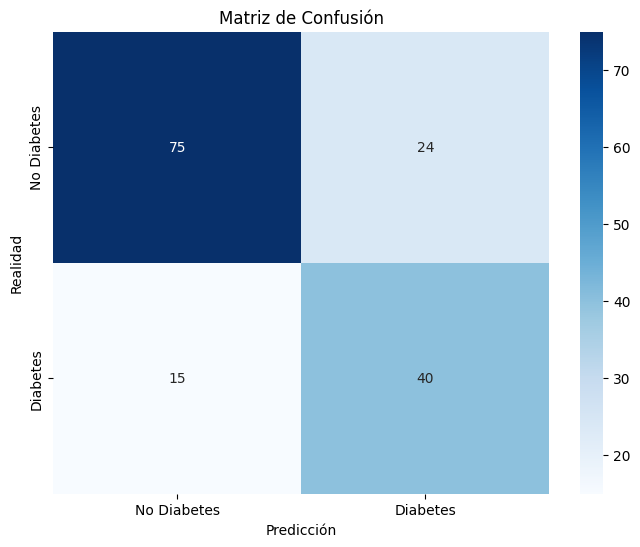

In [41]:
# Realizar predicciones
y_pred = dt_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Exactitud: {accuracy:.4f}')
print('Matriz de Confusión:')
print(conf_matrix)
print('Informe de Clasificación:')
print(class_report)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

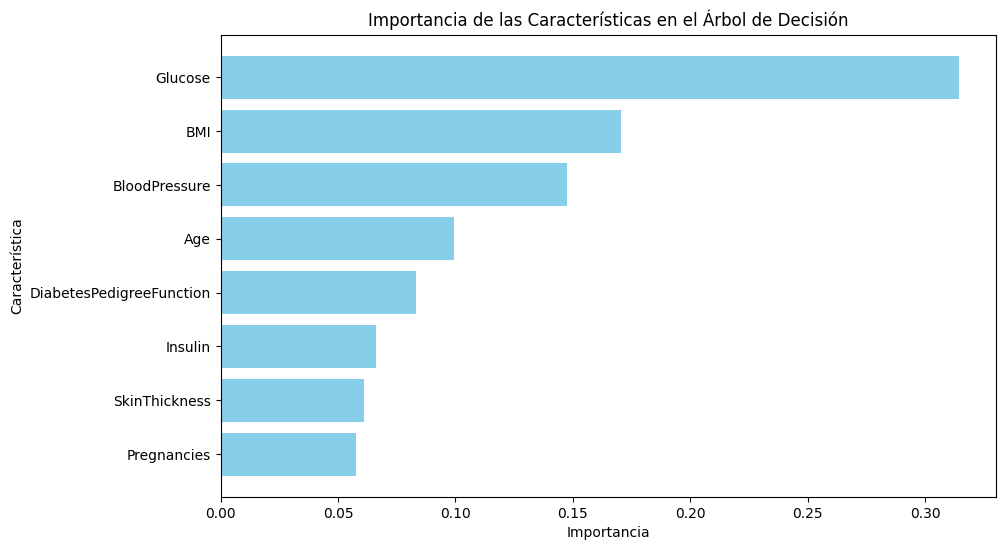

In [42]:


# Obtener la importancia de cada característica
feature_importances = dt_model.feature_importances_

# Crear un DataFrame para organizar la información
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por la importancia de las características
features_df = features_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.gca().invert_yaxis()  # Invertir el eje y para tener la característica más importante en la parte superior
plt.show()

In [44]:
dump(dt_model, open("decision_tree_diabetes.sav", "wb"))